# ASSIGNMENT 1: SPARK INVESTMENT FUNDING


In [153]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## DATA CLEANING

## 1. Upload the company and rounds2 Datasets

 Companies and  rounds2 showed an encoding error (-UTF-8 encode). This was solved by changing the encoding to 'latin1'

####  A)   UPLOAD THE COMPANIES DATASET AND SAVE AS COMPANIES

In [154]:
#upload the companies data
companies=pd.read_csv('companies.csv', encoding = "latin1")
companies.permalink=companies.permalink.str.encode("latin1").str.decode('ascii','ignore')
companies.name=companies.name.str.encode("latin1").str.decode('ascii','ignore')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [155]:
#shape of the companies dataframe
companies.shape

(66368, 10)

####   B)   UPLOAD ROUNDS2 DATASET AND SAVE AS ROUNDS2

In [156]:
#upload rounds data
rounds2=pd.read_csv('rounds2.csv',encoding='latin1')
rounds2.company_permalink=rounds2.company_permalink.str.encode("latin").str.decode('ascii','ignore')

rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [157]:
#shape of the dataframe rounds
rounds2.shape

(114949, 6)

## 2. Finding out unique company names in rounds2 dataset

In [158]:
len(rounds2['company_permalink'].value_counts())

90247

In [159]:
#change all the company permalink names in df_rounds2 to uppercase(so that all the names are in the same format)
rounds2['company_permalink']=[(x.upper()) for x in rounds2['company_permalink']]



In [160]:
#checking the for unique values after getting all names in the same format
x=len(rounds2['company_permalink'].value_counts())
x

66368

In [161]:
print("the number of unique company names in rounds2 dataset is {}".format(x))

the number of unique company names in rounds2 dataset is 66368


## 3. Finding out unique company names in companies dataset


In [162]:
#change all the company permalink names in comapny to uppercase(so that all the names are in the same format) and check for all uniques company names in company dataframe

companies['permalink']=[(x.upper()) for x in companies['permalink']]
y=len(companies['permalink'].value_counts())

In [163]:
print("the number of unique company names in companies dataset is {}".format(y))

the number of unique company names in companies dataset is 66368


## 4. Finding the column which can be used as unique key for each company

In [164]:
#checking the permalink column if it can be a unique key
companies['permalink'].value_counts().max()

1

In [165]:
# checking the 'name' column if it can be a unique key
companies['name'].value_counts().max()

4

In [166]:
#checking if 'homepage_url' can be a unique key.
companies['homepage_url'].value_counts().max()

5

 Homepage url and name columns are not unique. So, the unique key for a company will be column 'premalink' in companies dataframe

## 5. Checking if companies in companies dataframe are in rounds2 datframe

In [167]:
# Compare companies in 'companies' and 'rounds2'  data sets.
companies.permalink.isin(rounds2['company_permalink']).all()
print('all companies in companies file are in rounds2 file {}'.format(companies.permalink.isin(rounds2['company_permalink']).all()))

all companies in companies file are in rounds2 file True


##  6. Merging round2 and companies dataframe

In [168]:
master_frame=pd.merge(rounds2, companies,how = 'left',left_on = "company_permalink",right_on='permalink')

In [169]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [170]:
# shape of master_frame dataset.
master_frame.shape

(114949, 16)

## 7. Dealing with Missing values in Master_frame 

In [171]:


master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [172]:
#since the company_permalink and permalink refer to the same data.we can drop column'permalink'
master_frame=master_frame.drop(['permalink'],axis=1)

In [173]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [174]:
# also for our analysis the columns we require are 'company_permalink',funding_round_type, 'raised_amount_usd','category_list','country_code'.Dropping all other columns
master_frame=master_frame.drop(['funding_round_permalink','funding_round_code','funded_at','name','homepage_url','status','state_code','region','city','founded_at'],axis=1)

In [175]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code
0,/ORGANIZATION/-FAME,venture,10000000.0,Media,IND
1,/ORGANIZATION/-QOUNTER,venture,NaN,Application Platforms|Real Time|Social Network...,USA
2,/ORGANIZATION/-QOUNTER,seed,700000.0,Application Platforms|Real Time|Social Network...,USA
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,venture,3406878.0,Apps|Games|Mobile,NaN
4,/ORGANIZATION/0-6-COM,venture,2000000.0,Curated Web,CHN


In [176]:
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
raised_amount_usd     19990
category_list          3410
country_code           8678
dtype: int64

In [177]:
#finding percent null values in each column.
round((master_frame.isnull().sum())/len(master_frame.index)*100, 2)

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
category_list          2.97
country_code           7.55
dtype: float64

In [178]:
#Dropping all rows with null values
master_frame=master_frame[master_frame.isnull().sum(axis=1)<1]

In [179]:
master_frame.isnull().sum()

company_permalink     0
funding_round_type    0
raised_amount_usd     0
category_list         0
country_code          0
dtype: int64

In [180]:
master_frame.shape

(88529, 5)

## FUNDING TYPE ANALYSIS

## 1. Evaluating the funding.

In [181]:
#check the value counts of column 'funding_round_type'
master_frame['funding_round_type'].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [182]:
#create an empty list for representative funding
representative_funding=[]

In [183]:
#check the representative funding for venture type.
y=master_frame.loc[(master_frame['funding_round_type']=='venture') & (master_frame['raised_amount_usd']),:]
rep_venture=y['raised_amount_usd'].value_counts().idxmax()
print('the representative funding for venture capital is {}'.format(rep_venture))
representative_funding.append({'venture':rep_venture})

the representative funding for venture capital is 10000000.0


In [184]:
# check the funding type= angel capital
z=master_frame.loc[(master_frame['funding_round_type']=='angel') & (master_frame['raised_amount_usd']),:]
rep_angel=z['raised_amount_usd'].value_counts().idxmax()
print('the representative funding for angel capital is {}'.format(rep_angel))  
representative_funding.append({'angel':rep_angel}) 

the representative funding for angel capital is 500000.0


In [185]:
# check the funding type= seed capital
w=master_frame.loc[(master_frame['funding_round_type']=='seed') & (master_frame['raised_amount_usd']),:]
rep_seed=w['raised_amount_usd'].value_counts().idxmax()
print('the representative funding for seed capital is {}'.format(rep_seed))  
representative_funding.append({'seed':rep_seed}) 

the representative funding for seed capital is 1000000.0


In [186]:
# check the funding type= private_equity capital
e=master_frame.loc[(master_frame['funding_round_type']=='private_equity') & (master_frame['raised_amount_usd']),:]
rep_private =e['raised_amount_usd'].value_counts().idxmax()
print('the representative funding for private equity capital is {}'.format(rep_private)) 
representative_funding.append({'private_equity':rep_private})  

the representative funding for private equity capital is 100000000.0


In [187]:
#check the list of dictionaries with representative funding.
representative_funding

[{'venture': 10000000.0},
 {'angel': 500000.0},
 {'seed': 1000000.0},
 {'private_equity': 100000000.0}]

In [188]:
# check the suitable investment type for Spark Funds with investment range between 5000000 and 15000000.
Investment_upper=15000000
Investment_lower=5000000
for x in representative_funding:
    for key,value in x.items():
        if value>Investment_lower and value<Investment_upper:
            print('investment type that is the most suitable for Spark Funds  is {}'.format(key))

investment type that is the most suitable for Spark Funds  is venture


## COUNTRY ANALYSIS

In [189]:
#filter the data so it only contains the chosen investment type(venture)
master_frame=master_frame.loc[(master_frame['funding_round_type']=='venture'),:]

In [190]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code
0,/ORGANIZATION/-FAME,venture,10000000.0,Media,IND
4,/ORGANIZATION/0-6-COM,venture,2000000.0,Curated Web,CHN
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,venture,719491.0,Biotechnology,CAN
10,/ORGANIZATION/0XDATA,venture,20000000.0,Analytics,USA
11,/ORGANIZATION/0XDATA,venture,1700000.0,Analytics,USA


In [191]:
# top 9 countries with highest total funding in ventures

data_plot2=master_frame.groupby(['country_code']).raised_amount_usd.sum().sort_values(ascending=False)[:9]
data_plot2.to_frame()

,raised_amount_usd
country_code,
USA,4.200680e+11
CHN,3.933892e+10
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
FRA,7.226851e+09
ISR,6.854350e+09
DEU,6.306922e+09
JPN,3.167647e+09


In [192]:
#list of top 9 countries with highest total funding in ventures.
list9=((master_frame.groupby(['country_code']).raised_amount_usd.sum().sort_values(ascending=False)[:9]).index).to_list()
list9

['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN']

In [193]:
# create a dataframe top 9 with top 9 highest total funding in ventures. and save it as top9
top9=master_frame.loc[(master_frame.country_code.isin(list9)),:]

In [194]:
top9.shape

(44118, 5)

## Get the List of English speaking countries from wikipedia

In [195]:
#import wikipedia

import wikipedia as wp

In [196]:
#import requests and Beautifulsoup
import requests
from bs4 import BeautifulSoup

In [197]:
#get the url for the wikipedia page and send the request.
wikiurl='https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language'
response=requests.get(wikiurl)
print(response.status_code)

200


In [198]:
# get all the  wikitables from the page
soup = BeautifulSoup(response.text, 'lxml')
table_classes = {"class": ["sortable", "plainrowheaders"]}
wikitables = soup.findAll("table", table_classes)


In [199]:
# SCRAP the data from wikitables to get the list of all countries speaking english from wikipedia
data = []
for row in wikitables:
    data.append([t.text.strip() for t in row.find_all('td')])
data2=[]
for i in data[0:2]:
    for j in i:
        data2.append(j.split())
ENGLISH=data2[1::5] 
ENGLISH

[['AUS'],
 ['NZL'],
 ['GBR'],
 ['USA'],
 ['ATG'],
 ['BHS'],
 ['BRB'],
 ['BLZ'],
 ['BWA'],
 ['BDI'],
 ['CMR'],
 ['CAN'],
 ['DMA'],
 ['SWZ'],
 ['FJI'],
 ['GMB'],
 ['GHA'],
 ['GRD'],
 ['GUY'],
 ['IND'],
 ['IRL'],
 ['JAM'],
 ['KEN'],
 ['KIR'],
 ['LSO'],
 ['LBR'],
 ['MWI'],
 ['MLT'],
 ['MHL'],
 ['FSM'],
 ['NAM'],
 ['NRU'],
 ['NGA'],
 ['PAK'],
 ['PLW'],
 ['PNG'],
 ['PHL'],
 ['KNA'],
 ['LCA'],
 ['VCT'],
 ['WSM'],
 ['SYC'],
 ['SLE'],
 ['SGP'],
 ['SLB'],
 ['ZAF'],
 ['SSD'],
 ['SDN'],
 ['TZA'],
 ['TON'],
 ['TTO'],
 ['TUV'],
 ['VUT'],
 ['ZMB'],
 ['ZWE']]

## Find the Top 3 English speaking countries with highest total funding

In [200]:
# select the countries from our list9 which are english speaking
eng_list=list(x for x in list9 if [x] in ENGLISH )
print("English speaking countries in top9 {}".format(eng_list))

English speaking countries in top9 ['USA', 'GBR', 'IND', 'CAN']


In [201]:
# get the data for english speaking countries from top9 data set and save it as top_English dataset.
top_English=top9.loc[(top9.country_code.isin(eng_list)),:]
top_English

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code
0,/ORGANIZATION/-FAME,venture,10000000.0,Media,IND
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,venture,719491.0,Biotechnology,CAN
10,/ORGANIZATION/0XDATA,venture,20000000.0,Analytics,USA
11,/ORGANIZATION/0XDATA,venture,1700000.0,Analytics,USA
12,/ORGANIZATION/0XDATA,venture,8900000.0,Analytics,USA
...,...,...,...,...,...
114920,/ORGANIZATION/ZYOMYX-INC,venture,12000000.0,Biotechnology,USA
114922,/ORGANIZATION/ZYOMYX-INC,venture,14219999.0,Biotechnology,USA
114923,/ORGANIZATION/ZYOMYX-INC,venture,555016.0,Biotechnology,USA
114934,/ORGANIZATION/ZYRRA,venture,140500.0,E-Commerce,USA


In [202]:
#identify 3 top english speaking countries with highest total funding in ventures.
top3=top_English.groupby(['country_code']).raised_amount_usd.sum().sort_values(ascending=False).index.to_list()[:3]
print('top 3 english speaking countries with highest total funding are {}'.format(top3))

top 3 english speaking countries with highest total funding are ['USA', 'GBR', 'IND']


Thus 3 top most english speaking countries with highest total funding are USA, Great Britain and India.

In [203]:
# assign top 3 countries to Country_1,Country_2 and Country_3
Country_1=top3[0]
Country_2=top3[1]
Country_3=top3[2]


In [204]:
#create a copy of masterdataframe and save it as master_frame2
master_frame2=master_frame.copy()

In [205]:
master_frame2.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code
0,/ORGANIZATION/-FAME,venture,10000000.0,Media,IND
4,/ORGANIZATION/0-6-COM,venture,2000000.0,Curated Web,CHN
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,venture,719491.0,Biotechnology,CAN
10,/ORGANIZATION/0XDATA,venture,20000000.0,Analytics,USA
11,/ORGANIZATION/0XDATA,venture,1700000.0,Analytics,USA


In [206]:
#create a new column "primary sector" which is represented by the first part in the category list column in the datset master_frame
master_frame2['Primary_sector']=[(str(x).split("|"))[0] for x in master_frame2['category_list']]

In [207]:
master_frame.head(10)

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code
0,/ORGANIZATION/-FAME,venture,10000000.0,Media,IND
4,/ORGANIZATION/0-6-COM,venture,2000000.0,Curated Web,CHN
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,venture,719491.0,Biotechnology,CAN
10,/ORGANIZATION/0XDATA,venture,20000000.0,Analytics,USA
11,/ORGANIZATION/0XDATA,venture,1700000.0,Analytics,USA
12,/ORGANIZATION/0XDATA,venture,8900000.0,Analytics,USA
22,/ORGANIZATION/1-MAINSTREAM,venture,5000000.0,Apps|Cable|Distribution|Software,USA
28,/ORGANIZATION/10-MINUTES-WITH,venture,4000000.0,Education,GBR
34,/ORGANIZATION/1000MEMORIES,venture,2520000.0,Curated Web,USA
38,/ORGANIZATION/1000MUSEUMS-COM,venture,265940.0,Curated Web,USA


In [208]:
pd.set_option('display.max.rows',30)

In [209]:
# check the values of column 'Primary sector'
master_frame2['Primary_sector'].value_counts()


Biotechnology                 6794
Software                      4102
Advertising                   2215
Health Care                   1804
Enterprise Software           1752
                              ... 
Video Conferencing               1
Anything Capital Intensive       1
Collectibles                     1
Pre Seed                         1
Task Management                  1
Name: Primary_sector, Length: 603, dtype: int64

In [210]:
## turn the values in the Primary sector to lower case.
master_frame2['Primary_sector']=[(x.lower()) for x in master_frame2['Primary_sector']]


### 1. Upload mapping file 


In [211]:
#upload mapping dataset
df_mapping=pd.read_csv('mapping.csv')

In [212]:
#shape of the mapping dataset
df_mapping.shape

(688, 10)

In [213]:
df_mapping['category_list'].value_counts()

Accounting            1
Homeless Shelter      1
Social Commerce       1
Incentives            1
Gift Card             1
                     ..
ICT                   1
Auto                  1
Transportation        1
Utilities             1
Speech Recognition    1
Name: category_list, Length: 687, dtype: int64

After checking carefully observing the values of the category list, some values were having '0' in place of 'na' in the names like instead of analytics it showed a0lytics and management as ma0gement etc.

In [214]:
# converting the category_list to lower case and replacing '0' to 'na'
df_mapping['category_list']=[str(x).replace("0","na") for x in df_mapping['category_list']]
df_mapping['category_list']=[(x.lower()) for x in df_mapping['category_list']]

In [215]:

df_mapping['category_list'].value_counts()

interface design      1
big data analytics    1
cosmetics             1
social travel         1
design                1
                     ..
systems               1
life sciences         1
synchronization       1
entrepreneur          1
clean technology      1
Name: category_list, Length: 688, dtype: int64

In [216]:
#stack the columns in the mapping data set into a single column of main_sector
df_mapping.set_index('category_list',inplace=True)
df_mapping=df_mapping[df_mapping==1].stack().reset_index().drop(0,1)

In [217]:
#rename the column level_1 as Main_sector
df_mapping=df_mapping.rename(columns={"level_1":"Main_sector"})


In [218]:
df_mapping.head()

,category_list,Main_sector
0,nan,Blanks
1,3d,Manufacturing
2,3d printing,Manufacturing
3,3d technology,Manufacturing
4,accounting,"Social, Finance, Analytics, Advertising"


### Merge the master_frame2 and df_mapping dataframe

In [219]:
#merge the df_mapping dataset and the master_frame dataset 
master_frame2=pd.merge(master_frame2, df_mapping,how = 'left',left_on = "Primary_sector",right_on='category_list')


In [220]:
master_frame2.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list_x,country_code,Primary_sector,category_list_y,Main_sector
0,/ORGANIZATION/-FAME,venture,10000000.0,Media,IND,media,media,Entertainment
1,/ORGANIZATION/0-6-COM,venture,2000000.0,Curated Web,CHN,curated web,curated web,"News, Search and Messaging"
2,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,venture,719491.0,Biotechnology,CAN,biotechnology,biotechnology,Cleantech / Semiconductors
3,/ORGANIZATION/0XDATA,venture,20000000.0,Analytics,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"
4,/ORGANIZATION/0XDATA,venture,1700000.0,Analytics,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"


In [221]:
#to check if all values of column Primary_sector are in category_list_y 
master_frame2.Primary_sector.isin(master_frame2['category_list_y']).value_counts()

True     47789
False       20
Name: Primary_sector, dtype: int64

In [222]:
#find the primary sector values which were not in category_list_y and thus have NaN in Main _sector
master_frame2.loc[~(master_frame2.Primary_sector.isin(master_frame2['category_list_y'])),:].Primary_sector.value_counts()

enterprise 2.0                     7
retirement                         2
adaptive equipment                 2
rapidly expanding                  1
biotechnology and semiconductor    1
racing                             1
english-speaking                   1
enterprise hardware                1
greentech                          1
specialty retail                   1
natural gas uses                   1
product search                     1
Name: Primary_sector, dtype: int64

In [223]:
#dropping all null values
master_frame2 = master_frame2.dropna()

In [224]:
master_frame2.isnull().sum()

company_permalink     0
funding_round_type    0
raised_amount_usd     0
category_list_x       0
country_code          0
Primary_sector        0
category_list_y       0
Main_sector           0
dtype: int64

In [225]:
master_frame2.shape

(47789, 8)

## Sector Analysis 2

In [226]:
master_frame2=master_frame2.loc[(master_frame2.raised_amount_usd.isin(range(5000000,15000000))),:]

### Dataframe for Country1-USA

In [227]:
# dataset for USA
D1=master_frame2.loc[(master_frame2['country_code']=='USA'),:]
D1.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list_x,country_code,Primary_sector,category_list_y,Main_sector
5,/ORGANIZATION/0XDATA,venture,8900000.0,Analytics,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"
6,/ORGANIZATION/1-MAINSTREAM,venture,5000000.0,Apps|Cable|Distribution|Software,USA,apps,apps,"News, Search and Messaging"
29,/ORGANIZATION/128-TECHNOLOGY,venture,11999347.0,Service Providers|Technology,USA,service providers,service providers,Others
34,/ORGANIZATION/1366-TECHNOLOGIES,venture,5000000.0,Manufacturing,USA,manufacturing,manufacturing,Manufacturing
35,/ORGANIZATION/1366-TECHNOLOGIES,venture,5150000.0,Manufacturing,USA,manufacturing,manufacturing,Manufacturing


### Dataframe for Country2-GBR

In [228]:
#dataset for GBR
D2=master_frame2.loc[(master_frame2['country_code']=='GBR'),:]
D2.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list_x,country_code,Primary_sector,category_list_y,Main_sector
151,/ORGANIZATION/365SCORES,venture,5500000.0,Android|Apps|iPhone|Mobile|Sports,GBR,android,android,"Social, Finance, Analytics, Advertising"
336,/ORGANIZATION/7DIGITAL,venture,8468328.0,Content Creators|Content Delivery|Licensing|Mu...,GBR,content creators,content creators,Entertainment
337,/ORGANIZATION/7DIGITAL,venture,10000000.0,Content Creators|Content Delivery|Licensing|Mu...,GBR,content creators,content creators,Entertainment
365,/ORGANIZATION/90MIN,venture,5800000.0,Media|News|Publishing|Soccer|Sports,GBR,media,media,Entertainment
441,/ORGANIZATION/ABCODIA,venture,8259067.0,Biotechnology,GBR,biotechnology,biotechnology,Cleantech / Semiconductors


### Dataframe for Country3- IND

In [229]:
#dataset for IND
D3=master_frame2.loc[(master_frame2['country_code']=='IND'),:]
D3.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list_x,country_code,Primary_sector,category_list_y,Main_sector
0,/ORGANIZATION/-FAME,venture,10000000.0,Media,IND,media,media,Entertainment
77,/ORGANIZATION/21DIAMONDS-INDIA,venture,6369507.0,E-Commerce,IND,e-commerce,e-commerce,Others
397,/ORGANIZATION/A-LITTLE-WORLD,venture,6410000.0,Finance,IND,finance,finance,"Social, Finance, Analytics, Advertising"
1147,/ORGANIZATION/ADLABS-IMAGICA,venture,8180000.0,Entertainment|Tourism,IND,entertainment,entertainment,Entertainment
1571,/ORGANIZATION/AGILE,venture,5740000.0,Finance|Finance Technology|FinTech|Insurance,IND,finance,finance,"Social, Finance, Analytics, Advertising"


### Total number of investments by  Country1,Country2 and Country3

In [230]:
#Total number of investments by D1,D2,D3 COUNTRIES
print('The total number of investment in {} {}'.format(Country_1,D1.shape[0]))
print('The total number of investment in {} {}'.format(Country_2,D2.shape[0]))
print('The total number of investment in {} {}'.format(Country_3,D3.shape[0]))

The total number of investment in USA 11227
The total number of investment in GBR 602
The total number of investment in IND 293


### Total amount of investments by Country1,Country2 and Country3

In [231]:
#total amount of investments -(sum of raised_amount_usd) by D1,D2,D3 countries

print('The total amount of investment in {} {}'.format(Country_1,D1['raised_amount_usd'].sum()))
print('The total amount of investment in  {} {}'.format(Country_2,D2['raised_amount_usd'].sum()))
print('The total amount of investment in  {} {}'.format(Country_3,D3['raised_amount_usd'].sum()))

The total amount of investment in USA 95217097294.0
The total amount of investment in  GBR 5094078691.0
The total amount of investment in  IND 2424543602.0


###  Top 3 sector (based on count of investments) in Country1,Country2 and Country3

In [232]:
# top sector investment.
print('The top sector  investment in {} {}'.format(Country_1,(D1['Main_sector'].value_counts().index.to_list())[:3]))
print('The top sector investment in  {} {}'.format(Country_2,(D2['Main_sector'].value_counts().index.to_list())[:3]))
print('The top sector investment in  {} {}'.format(Country_3,(D3['Main_sector'].value_counts().index.to_list())[:3]))

The top sector  investment in USA ['Others', 'Social, Finance, Analytics, Advertising', 'Cleantech / Semiconductors']
The top sector investment in  GBR ['Others', 'Social, Finance, Analytics, Advertising', 'Cleantech / Semiconductors']
The top sector investment in  IND ['Others', 'News, Search and Messaging', 'Social, Finance, Analytics, Advertising']


### Number of investments in the top sector in Country1,Country2 and Country3

In [233]:
#top 3 total number of investments as per main sector in top 3 countries
print(Country_1,"\n", D1['Main_sector'].value_counts()[:3])
print(Country_2,"\n", D2['Main_sector'].value_counts()[:3])
print(Country_3,"\n", D3['Main_sector'].value_counts()[:3])

USA 
 Others                                     2755
Social, Finance, Analytics, Advertising    2522
Cleantech / Semiconductors                 2181
Name: Main_sector, dtype: int64
GBR 
 Others                                     140
Social, Finance, Analytics, Advertising    129
Cleantech / Semiconductors                 128
Name: Main_sector, dtype: int64
IND 
 Others                                     95
News, Search and Messaging                 51
Social, Finance, Analytics, Advertising    51
Name: Main_sector, dtype: int64


### For the top sector count-wise  which company received the highest investment?

In [234]:
# company which recieved maximum funding in top sector in USA
print('the company with maximum funding in top sector in {} is {}'.format(Country_1,((D1.loc[(D1['Main_sector']=='Others'),:]).groupby('company_permalink').raised_amount_usd.sum().sort_values(ascending=False)).index[0]))
print('the company with maximum funding in top sector in {} is {}'.format(Country_2,((D2.loc[(D2['Main_sector']=='Others'),:]).groupby('company_permalink').raised_amount_usd.sum().sort_values(ascending=False)).index[0]))
print('the company with maximum funding in top sector in {} is {}'.format(Country_3,((D3.loc[(D3['Main_sector']=='Others'),:]).groupby('company_permalink').raised_amount_usd.sum().sort_values(ascending=False)).index[0]))

the company with maximum funding in top sector in USA is /ORGANIZATION/AIRTIGHT-NETWORKS
the company with maximum funding in top sector in GBR is /ORGANIZATION/ELECTRIC-CLOUD
the company with maximum funding in top sector in IND is /ORGANIZATION/MYNTRA


### For the second-best sector count-wise, which company received the highest investment?

In [235]:
#company that recieved maximum funding in second top sector in top 3 countries
print('the company with maximum funding in second top sector in {} is {}'.format(Country_1,((D1.loc[(D1['Main_sector']=='Social, Finance, Analytics, Advertising'),:]).groupby('company_permalink').raised_amount_usd.sum().sort_values(ascending=False)).index[0]))
print('the company with maximum funding in second top sector in {} is {}'.format(Country_2,((D2.loc[(D2['Main_sector']=='Social, Finance, Analytics, Advertising'),:]).groupby('company_permalink').raised_amount_usd.sum().sort_values(ascending=False)).index[0]))
print('the company with maximum funding in second top sector in {} is {}'.format(Country_3,((D3.loc[(D3['Main_sector']=='News, Search and Messaging'),:]).groupby('company_permalink').raised_amount_usd.sum().sort_values(ascending=False)).index[0]))

the company with maximum funding in second top sector in USA is /ORGANIZATION/SHOTSPOTTER
the company with maximum funding in second top sector in GBR is /ORGANIZATION/CELLTICK-TECHNOLOGIES
the company with maximum funding in second top sector in IND is /ORGANIZATION/GUPSHUP-TECHNOLOGY-INDIA-PVT-LTD


## PLOTS

In [236]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [237]:
import plotly

## A plot showing the representative amount of investment in each funding type.   

In [238]:
ventures=[]
values=[]
for x in representative_funding:
    for y in x.keys():
        ventures.append(y)
    for z in x.values():
        values.append(z)
ventures
values

[10000000.0, 500000.0, 1000000.0, 100000000.0]

In [239]:
import plotly.graph_objects as go

x = ventures
y = values

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto')])
fig.update_layout(
title="Representative Funding",
xaxis_title="Funding type",
yaxis_title="Representative Investment Amount")

fig.show()

### A plot showing the top 9 countries against the total amount of investments of funding type FT. 

In [240]:
F=data_plot2.to_frame()
F

,raised_amount_usd
country_code,
USA,4.200680e+11
CHN,3.933892e+10
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
FRA,7.226851e+09
ISR,6.854350e+09
DEU,6.306922e+09
JPN,3.167647e+09


In [241]:

import plotly.graph_objects as go

colors = ['blue',] *9
colors[0] = 'crimson'
colors[2]='crimson'
colors[3]='crimson'


fig = go.Figure(data=[go.Bar(
    x=F.index,
    y=F['raised_amount_usd'],
    marker_color=colors,
)])
fig.update_layout(title_text='Top 9 Countries',
xaxis_title="countries",
yaxis_title="Total Investment Amount")

## A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

In [243]:
d=master_frame2.loc[(master_frame2.country_code.isin(top3)),:]
result=d.groupby(['country_code']).Main_sector.value_counts().groupby(level=0, group_keys=False).head(3).unstack()
result

Main_sector,Others,"Social, Finance, Analytics, Advertising",Cleantech / Semiconductors,"News, Search and Messaging"
country_code,,,,
GBR,140.0,129.0,128.0,NaN
IND,95.0,51.0,NaN,51.0
USA,2755.0,2522.0,2181.0,NaN


Text(0.5, 1.0, 'top 3 sectors in top3 countries')

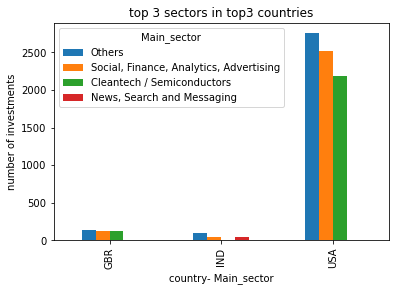

In [244]:

result.plot(kind='bar')
plt.xlabel('country- Main_sector')
plt.ylabel('number of investments')
plt.title('top 3 sectors in top3 countries')

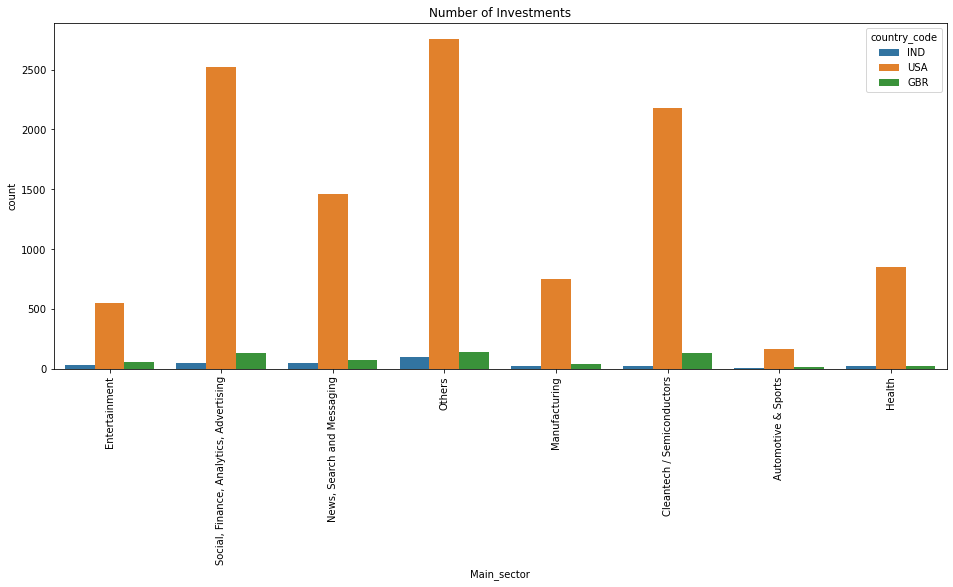

In [245]:
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 2)
q = sns.countplot(x='Main_sector', hue='country_code', data=d)
q.set_xticklabels(q.get_xticklabels(),rotation=90)
plt.title('Number of Investments')


plt.show()